In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from bs4 import BeautifulSoup
import requests

In [2]:
# Request for 5K results and checking status code   
url5K = "https://www.hubertiming.com/results/2019Cinco5K"
response5K = requests.get(url5K)
response5K.status_code

200

In [3]:
#Connecting with Beautiful Soap for 5K results
page5K = response5K.text
soup5K = BeautifulSoup(page5K, "lxml")
soup5K.prettify()

'<!DOCTYPE html>\n<html>\n <head>\n  <meta content="Race results for the 2019 Cinco de Mayo 5K 10K Half!" property="og:title"/>\n  <meta content="Results of the 2019 Cinco de Mayo 5K 10K Half at Kliever Armory in Portland, OR" property="og:description"/>\n  <meta content="https://www.hubertiming.com/results/2019CincoDeMayo.jpg" property="og:image"/>\n  <meta content="https://www.hubertiming.com/results/2019Cinco5K" property="og:url"/>\n  <meta content="width=device-width, initial-scale=1, shrink-to-fit=no" name="viewport"/>\n  <title>\n   Race results for the 2019 Cinco de Mayo 5K 10K Half!\n  </title>\n  <link crossorigin="anonymous" href="https://stackpath.bootstrapcdn.com/bootstrap/4.2.1/css/bootstrap.min.css" rel="stylesheet"/>\n  <link href="https://use.fontawesome.com/releases/v5.13.0/css/all.css" rel="stylesheet"/>\n  <link href="//cdn.rawgit.com/noelboss/featherlight/1.7.11/release/featherlight.min.css" rel="stylesheet" type="text/css"/>\n  <link href="//cdn.rawgit.com/noelboss

In [4]:
#Get title from web page that we requested
title5K = soup5K.title
print(title5K.text)

Race results for the 2019 Cinco de Mayo 5K 10K Half!


In [5]:
#Getting rows of table data - "tr" means table row
rows5K = soup5K.find_all("tr")
rows5K

[<tr colspan="2">
 <b>5K:</b>
 </tr>,
 <tr>
 <td>Finishers:</td>
 <td>389</td>
 </tr>,
 <tr>
 <td>Male:</td>
 <td>157</td>
 </tr>,
 <tr>
 <td>Female:</td>
 <td>232</td>
 </tr>,
 <tr class="header">
 <th>Place</th>
 <th>Bib</th>
 <th>Name</th>
 <th>Gender</th>
 <th>Age</th>
 <th>City</th>
 <th>State</th>
 <th>Chip Time</th>
 <th>Chip Pace</th>
 <th>Gender Place</th>
 <th>Age Group</th>
 <th>Age Group Place</th>
 <th>Time to Start</th>
 <th>Gun Time</th>
 </tr>,
 <tr>
 <td>1</td>
 <td>3465</td>
 <td>
 
                     ANDREW LOAIZA
 
                 </td>
 <td>M</td>
 <td>31</td>
 <td>PORTLAND</td>
 <td>OR</td>
 <td>17:00</td>
 <td>5:28</td>
 <td>
 
                     1 of 157
 
                 </td>
 <td>M 30-34</td>
 <td>
 
                     1 of 17
 
                 </td>
 <td>0:02</td>
 <td>17:02</td>
 </tr>,
 <tr>
 <td>2</td>
 <td>3471</td>
 <td>
 
                     JOE DUDMAN
 
                 </td>
 <td>M</td>
 <td>54</td>
 <td>PORTLAND</td>
 <td>OR</td>
 <td>19:0

In [6]:
#Gettind table cells using Regular Expressions
import re
result_list5K = []
for row in rows5K:
    cells5K = row.find_all('td')
    cells_to_string5K = str(cells5K)
    cells_sub5K = (re.sub(re.compile('<.*?>'),'',cells_to_string5K))
    result_list5K.append(cells_sub5K)

#Converting Result Table to Data Frame
result5K = pd.DataFrame(result_list5K)
result5K

,0
0,[]
1,"[Finishers:, 389]"
2,"[Male:, 157]"
3,"[Female:, 232]"
4,[]
...,...
389,"[385, 3362, \r\n\r\n KAMRON..."
390,"[386, 3329, \r\n\r\n KASIA ..."
391,"[387, 3244, \r\n\r\n MERRID..."
392,"[388, 3372, \r\n\r\n SHANNO..."


In [7]:
result5K.head(10)

,0
0,[]
1,"[Finishers:, 389]"
2,"[Male:, 157]"
3,"[Female:, 232]"
4,[]
5,"[1, 3465, \r\n\r\n ANDREW L..."
6,"[2, 3471, \r\n\r\n JOE DUDM..."
7,"[3, 3248, \r\n\r\n IRIS POW..."
8,"[4, 3405, \r\n\r\n SEBASTIA..."
9,"[5, 3352, \r\n\r\n OLIVIA K..."


In [8]:
# Split each row to cells with ","

result_split5K = result5K[0].str.split(',',expand=True)
result_split5K.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,[],None,None,None,None,None,None,None,None,None,None,None,None,None
1,[Finishers:,389],None,None,None,None,None,None,None,None,None,None,None,None
2,[Male:,157],None,None,None,None,None,None,None,None,None,None,None,None
3,[Female:,232],None,None,None,None,None,None,None,None,None,None,None,None
4,[],None,None,None,None,None,None,None,None,None,None,None,None,None
5,[1,3465,\r\n\r\n ANDREW LOAIZA\r\n...,M,31,PORTLAND,OR,17:00,5:28,\r\n\r\n 1 of 157\r\n\r\n ...,M 30-34,\r\n\r\n 1 of 17\r\n\r\n ...,0:02,17:02]
6,[2,3471,\r\n\r\n JOE DUDMAN\r\n\r\...,M,54,PORTLAND,OR,19:03,6:07,\r\n\r\n 2 of 157\r\n\r\n ...,M 50-54,\r\n\r\n 1 of 19\r\n\r\n ...,0:02,19:05]
7,[3,3248,\r\n\r\n IRIS POWELL\r\n\r...,F,31,PORTLAND,OR,19:05,6:08,\r\n\r\n 1 of 232\r\n\r\n ...,F 30-34,\r\n\r\n 1 of 33\r\n\r\n ...,0:03,19:08]
8,[4,3405,\r\n\r\n SEBASTIAN THORP\r...,M,16,HAPPY VALLEY,OR,19:31,6:17,\r\n\r\n 3 of 157\r\n\r\n ...,M 15-19,\r\n\r\n 1 of 3\r\n\r\n ...,0:05,19:36]
9,[5,3352,\r\n\r\n OLIVIA KATBI SMIT...,F,27,PORTLAND,OR,19:50,6:23,\r\n\r\n 2 of 232\r\n\r\n ...,F 25-29,\r\n\r\n 1 of 29\r\n\r\n ...,0:02,19:52]


In [9]:
# Removing first 5 rows

result_remove5K = result_split5K.iloc[5:]
result_remove5K.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
5,[1,3465,\r\n\r\n ANDREW LOAIZA\r\n...,M,31,PORTLAND,OR,17:00,5:28,\r\n\r\n 1 of 157\r\n\r\n ...,M 30-34,\r\n\r\n 1 of 17\r\n\r\n ...,0:02,17:02]
6,[2,3471,\r\n\r\n JOE DUDMAN\r\n\r\...,M,54,PORTLAND,OR,19:03,6:07,\r\n\r\n 2 of 157\r\n\r\n ...,M 50-54,\r\n\r\n 1 of 19\r\n\r\n ...,0:02,19:05]
7,[3,3248,\r\n\r\n IRIS POWELL\r\n\r...,F,31,PORTLAND,OR,19:05,6:08,\r\n\r\n 1 of 232\r\n\r\n ...,F 30-34,\r\n\r\n 1 of 33\r\n\r\n ...,0:03,19:08]
8,[4,3405,\r\n\r\n SEBASTIAN THORP\r...,M,16,HAPPY VALLEY,OR,19:31,6:17,\r\n\r\n 3 of 157\r\n\r\n ...,M 15-19,\r\n\r\n 1 of 3\r\n\r\n ...,0:05,19:36]
9,[5,3352,\r\n\r\n OLIVIA KATBI SMIT...,F,27,PORTLAND,OR,19:50,6:23,\r\n\r\n 2 of 232\r\n\r\n ...,F 25-29,\r\n\r\n 1 of 29\r\n\r\n ...,0:02,19:52]
10,[6,3380,\r\n\r\n ORAIN HIBBERT\r\n...,M,32,PORTLAND,OR,20:15,6:31,\r\n\r\n 4 of 157\r\n\r\n ...,M 30-34,\r\n\r\n 2 of 17\r\n\r\n ...,0:08,20:23]
11,[7,3442,\r\n\r\n DAVE ROSS\r\n\r\n...,M,51,BEAVERTON,OR,20:56,6:44,\r\n\r\n 5 of 157\r\n\r\n ...,M 50-54,\r\n\r\n 2 of 19\r\n\r\n ...,0:02,20:58]
12,[8,3272,\r\n\r\n JOE DVORAK\r\n\r\...,M,43,PORTLAND,OR,21:38,6:58,\r\n\r\n 6 of 157\r\n\r\n ...,M 40-44,\r\n\r\n 1 of 14\r\n\r\n ...,0:04,21:42]
13,[9,3356,\r\n\r\n ANDREW HAYES\r\n\...,M,24,GRESHAM,OR,21:42,6:59,\r\n\r\n 7 of 157\r\n\r\n ...,M 20-24,\r\n\r\n 1 of 8\r\n\r\n ...,0:23,22:05]
14,[10,3413,\r\n\r\n JACK WINTERS\r\n\...,M,61,PORTLAND,OR,21:58,7:04,\r\n\r\n 8 of 157\r\n\r\n ...,M 60-64,\r\n\r\n 1 of 4\r\n\r\n ...,0:03,22:01]


In [10]:
# Getting table name to set for columns name

table5K = soup5K.find("table",attrs={"id":"individualResults"})
header5K = table5K.find_all("th")
column_name5K = []
for row in header5K:
    column_name5K.append(row.text)
column_name5K

result_remove5K.columns=column_name5K
result_remove5K.head()

,Place,Bib,Name,Gender,Age,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time
5,[1,3465,\r\n\r\n ANDREW LOAIZA\r\n...,M,31,PORTLAND,OR,17:00,5:28,\r\n\r\n 1 of 157\r\n\r\n ...,M 30-34,\r\n\r\n 1 of 17\r\n\r\n ...,0:02,17:02]
6,[2,3471,\r\n\r\n JOE DUDMAN\r\n\r\...,M,54,PORTLAND,OR,19:03,6:07,\r\n\r\n 2 of 157\r\n\r\n ...,M 50-54,\r\n\r\n 1 of 19\r\n\r\n ...,0:02,19:05]
7,[3,3248,\r\n\r\n IRIS POWELL\r\n\r...,F,31,PORTLAND,OR,19:05,6:08,\r\n\r\n 1 of 232\r\n\r\n ...,F 30-34,\r\n\r\n 1 of 33\r\n\r\n ...,0:03,19:08]
8,[4,3405,\r\n\r\n SEBASTIAN THORP\r...,M,16,HAPPY VALLEY,OR,19:31,6:17,\r\n\r\n 3 of 157\r\n\r\n ...,M 15-19,\r\n\r\n 1 of 3\r\n\r\n ...,0:05,19:36]
9,[5,3352,\r\n\r\n OLIVIA KATBI SMIT...,F,27,PORTLAND,OR,19:50,6:23,\r\n\r\n 2 of 232\r\n\r\n ...,F 25-29,\r\n\r\n 1 of 29\r\n\r\n ...,0:02,19:52]


In [11]:
# Replacing characters such as  "[", "]" and "\r\n\r\n "
result_remove5K["Place"] = result_remove5K["Place"].str.replace("[","")
result_remove5K["Name"] = result_remove5K["Name"].str.replace("\r\n\r\n ","")
result_remove5K["Name"] = result_remove5K["Name"].str.replace("...","",3)
result_remove5K["Gender Place"] = result_remove5K["Gender Place"].str.replace("\r\n\r\n ","")
result_remove5K["Age Group Place"] = result_remove5K["Age Group Place"].str.replace("\r\n\r\n ","")
result_remove5K["Gun Time"] = result_remove5K["Gun Time"].str.replace("]","")
result_remove5K["Age Group"] = result_remove5K["Age Group"].str.replace("M","")
result_remove5K["Age Group"] = result_remove5K["Age Group"].str.replace("F","")
result_remove5K["Chip Pace"] = result_remove5K["Chip Pace"].str.replace(":",".")
result_remove5K.head(10)

/Users/yalinyener/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/yalinyener/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/yalinyener/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

,Place,Bib,Name,Gender,Age,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time
5,1,3465,ANDREW LOAIZA,M,31,PORTLAND,OR,17:00,5.28,1 of 157,30-34,1 of 17,0:02,17:02
6,2,3471,JOE DUDMAN,M,54,PORTLAND,OR,19:03,6.07,2 of 157,50-54,1 of 19,0:02,19:05
7,3,3248,IRIS POWELL,F,31,PORTLAND,OR,19:05,6.08,1 of 232,30-34,1 of 33,0:03,19:08
8,4,3405,SEBASTIAN THORP,M,16,HAPPY VALLEY,OR,19:31,6.17,3 of 157,15-19,1 of 3,0:05,19:36
9,5,3352,OLIVIA KATBI SMITH,F,27,PORTLAND,OR,19:50,6.23,2 of 232,25-29,1 of 29,0:02,19:52
10,6,3380,ORAIN HIBBERT,M,32,PORTLAND,OR,20:15,6.31,4 of 157,30-34,2 of 17,0:08,20:23
11,7,3442,DAVE ROSS,M,51,BEAVERTON,OR,20:56,6.44,5 of 157,50-54,2 of 19,0:02,20:58
12,8,3272,JOE DVORAK,M,43,PORTLAND,OR,21:38,6.58,6 of 157,40-44,1 of 14,0:04,21:42
13,9,3356,ANDREW HAYES,M,24,GRESHAM,OR,21:42,6.59,7 of 157,20-24,1 of 8,0:23,22:05
14,10,3413,JACK WINTERS,M,61,PORTLAND,OR,21:58,7.04,8 of 157,60-64,1 of 4,0:03,22:01


In [12]:
#Checking dtypes of columns

result_remove5K.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389 entries, 5 to 393
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Place            389 non-null    object
 1   Bib              389 non-null    object
 2   Name             389 non-null    object
 3   Gender           389 non-null    object
 4   Age              389 non-null    object
 5   City             389 non-null    object
 6   State            389 non-null    object
 7   Chip Time        389 non-null    object
 8   Chip Pace        389 non-null    object
 9   Gender Place     389 non-null    object
 10  Age Group        389 non-null    object
 11  Age Group Place  389 non-null    object
 12  Time to Start    389 non-null    object
 13  Gun Time         389 non-null    object
dtypes: object(14)
memory usage: 42.7+ KB


In [13]:
#Converting Age column to Integer and Chip Pace column to Float
result_remove5K["Age"] = result_remove5K["Age"].astype("int")
result_remove5K["Chip Pace"] = result_remove5K["Chip Pace"].astype("float")
result_remove5K.head(10)

/Users/yalinyener/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/yalinyener/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Place,Bib,Name,Gender,Age,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time
5,1,3465,ANDREW LOAIZA,M,31,PORTLAND,OR,17:00,5.28,1 of 157,30-34,1 of 17,0:02,17:02
6,2,3471,JOE DUDMAN,M,54,PORTLAND,OR,19:03,6.07,2 of 157,50-54,1 of 19,0:02,19:05
7,3,3248,IRIS POWELL,F,31,PORTLAND,OR,19:05,6.08,1 of 232,30-34,1 of 33,0:03,19:08
8,4,3405,SEBASTIAN THORP,M,16,HAPPY VALLEY,OR,19:31,6.17,3 of 157,15-19,1 of 3,0:05,19:36
9,5,3352,OLIVIA KATBI SMITH,F,27,PORTLAND,OR,19:50,6.23,2 of 232,25-29,1 of 29,0:02,19:52
10,6,3380,ORAIN HIBBERT,M,32,PORTLAND,OR,20:15,6.31,4 of 157,30-34,2 of 17,0:08,20:23
11,7,3442,DAVE ROSS,M,51,BEAVERTON,OR,20:56,6.44,5 of 157,50-54,2 of 19,0:02,20:58
12,8,3272,JOE DVORAK,M,43,PORTLAND,OR,21:38,6.58,6 of 157,40-44,1 of 14,0:04,21:42
13,9,3356,ANDREW HAYES,M,24,GRESHAM,OR,21:42,6.59,7 of 157,20-24,1 of 8,0:23,22:05
14,10,3413,JACK WINTERS,M,61,PORTLAND,OR,21:58,7.04,8 of 157,60-64,1 of 4,0:03,22:01


In [14]:
#Creating new column ("RaceTimeSeconds") and converting Chip Time to new column as seconds


TotalRaceTimeArray = []

for time_array in result_remove5K["Chip Time"].str.split(":"):
    TotalRaceTime = 0
    coef = 60**(len(time_array)-1)
    for time in time_array:
        TotalRaceTime+=int(time)*coef
        coef=coef/60
    TotalRaceTimeArray.append(TotalRaceTime)
result_remove5K["RaceTimeSeconds"]=TotalRaceTimeArray


/Users/yalinyener/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [15]:
import datetime

result_remove5K["Race Time"] = result_remove5K.RaceTimeSeconds.apply(lambda x: datetime.timedelta(seconds=x))
result_remove5K.head(10)

/Users/yalinyener/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Place,Bib,Name,Gender,Age,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,RaceTimeSeconds,Race Time
5,1,3465,ANDREW LOAIZA,M,31,PORTLAND,OR,17:00,5.28,1 of 157,30-34,1 of 17,0:02,17:02,1020.0,00:17:00
6,2,3471,JOE DUDMAN,M,54,PORTLAND,OR,19:03,6.07,2 of 157,50-54,1 of 19,0:02,19:05,1143.0,00:19:03
7,3,3248,IRIS POWELL,F,31,PORTLAND,OR,19:05,6.08,1 of 232,30-34,1 of 33,0:03,19:08,1145.0,00:19:05
8,4,3405,SEBASTIAN THORP,M,16,HAPPY VALLEY,OR,19:31,6.17,3 of 157,15-19,1 of 3,0:05,19:36,1171.0,00:19:31
9,5,3352,OLIVIA KATBI SMITH,F,27,PORTLAND,OR,19:50,6.23,2 of 232,25-29,1 of 29,0:02,19:52,1190.0,00:19:50
10,6,3380,ORAIN HIBBERT,M,32,PORTLAND,OR,20:15,6.31,4 of 157,30-34,2 of 17,0:08,20:23,1215.0,00:20:15
11,7,3442,DAVE ROSS,M,51,BEAVERTON,OR,20:56,6.44,5 of 157,50-54,2 of 19,0:02,20:58,1256.0,00:20:56
12,8,3272,JOE DVORAK,M,43,PORTLAND,OR,21:38,6.58,6 of 157,40-44,1 of 14,0:04,21:42,1298.0,00:21:38
13,9,3356,ANDREW HAYES,M,24,GRESHAM,OR,21:42,6.59,7 of 157,20-24,1 of 8,0:23,22:05,1302.0,00:21:42
14,10,3413,JACK WINTERS,M,61,PORTLAND,OR,21:58,7.04,8 of 157,60-64,1 of 4,0:03,22:01,1318.0,00:21:58


In [16]:
result_remove5K["Race Type"] = "5K"

Final_Result_5K = result_remove5K[["Place","Name","Gender","Age","Race Time","Chip Pace","RaceTimeSeconds","Age Group","Race Type"]]
Final_Result_5K

/Users/yalinyener/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Place,Name,Gender,Age,Race Time,Chip Pace,RaceTimeSeconds,Age Group,Race Type
5,1,ANDREW LOAIZA,M,31,00:17:00,5.28,1020.0,30-34,5K
6,2,JOE DUDMAN,M,54,00:19:03,6.07,1143.0,50-54,5K
7,3,IRIS POWELL,F,31,00:19:05,6.08,1145.0,30-34,5K
8,4,SEBASTIAN THORP,M,16,00:19:31,6.17,1171.0,15-19,5K
9,5,OLIVIA KATBI SMITH,F,27,00:19:50,6.23,1190.0,25-29,5K
...,...,...,...,...,...,...,...,...,...
389,385,KAMRON GRAHAM,F,46,00:57:26,18.29,3446.0,45-49,5K
390,386,KASIA RUTLEDGE,F,39,00:57:27,18.29,3447.0,35-39,5K
391,387,MERRIDEE RENSHALL,F,61,00:58:28,18.49,3508.0,60-64,5K
392,388,SHANNON OLSEN,F,29,01:20:10,25.48,4810.0,25-29,5K


In [17]:
# 10K
url10K = "https://www.hubertiming.com/results/2019Cinco10K"
response10K = requests.get(url10K)
page10K = response10K.text
soup10K = BeautifulSoup(page10K, "lxml")

rows10K = soup10K.find_all("tr")

result_list10K = []
for row in rows10K:
    cells10K = row.find_all('td')
    cells_to_string10K = str(cells10K)
    cells_sub10K = (re.sub(re.compile('<.*?>'),'',cells_to_string10K))
    result_list10K.append(cells_sub10K)

result10K = pd.DataFrame(result_list10K)

result_split10K = result10K[0].str.split(',',expand=True)

result_remove10K = result_split10K.iloc[5:319,:14]

result_remove10K.head(10)

table10K = soup10K.find("table",attrs={"id":"individualResults"})
header10K = table10K.find_all("th")
column_name10K = []
for row in header10K:
    column_name10K.append(row.text)

result_remove10K.columns=column_name10K
result_remove10K.head()

result_remove10K["Place"] = result_remove10K["Place"].str.replace("[","")
result_remove10K["Name"] = result_remove10K["Name"].str.replace("\r\n\r\n ","")
result_remove10K["Name"] = result_remove10K["Name"].str.replace("...","",3)
result_remove10K["Gender Place"] = result_remove10K["Gender Place"].str.replace("\r\n\r\n ","")
result_remove10K["Age Group Place"] = result_remove10K["Age Group Place"].str.replace("\r\n\r\n ","")
result_remove10K["Gun Time"] = result_remove10K["Gun Time"].str.replace("]","")
result_remove10K["Age Group"] = result_remove10K["Age Group"].str.replace("M","")
result_remove10K["Age Group"] = result_remove10K["Age Group"].str.replace("F","")
result_remove10K["Chip Pace"] = result_remove10K["Chip Pace"].str.replace(":",".")

result_remove10K["Age"] = result_remove10K["Age"].astype("int")


TotalRaceTimeArray10K = []

for time_array in result_remove10K["Chip Time"].str.split(":"):
    TotalRaceTime = 0
    coef = 60**(len(time_array)-1)
    for time in time_array:
        TotalRaceTime+=int(time)*coef
        coef=coef/60
    TotalRaceTimeArray10K.append(TotalRaceTime)


result_remove10K["RaceTimeSeconds"]=TotalRaceTimeArray10K

import datetime

result_remove10K["Race Time"] = result_remove10K.RaceTimeSeconds.apply(lambda x: datetime.timedelta(seconds=x))

result_remove10K["Race Type"] = "10K"

Final_Result_10K = result_remove10K[["Place","Name","Gender","Age","Race Time","Chip Pace","RaceTimeSeconds","Age Group","Race Type"]]
Final_Result_10K

,Place,Name,Gender,Age,Race Time,Chip Pace,RaceTimeSeconds,Age Group,Race Type
5,1,ERIK HILLIER,M,28,00:38:36,6.13,2316.0,25-29,10K
6,2,SHEA VALLAIRE,F,24,00:38:58,6.17,2338.0,20-24,10K
7,3,EMILY PAINTER,F,31,00:39:45,6.24,2385.0,30-34,10K
8,4,NICHOLAS ROVITO,M,32,00:40:04,6.27,2404.0,30-34,10K
9,5,JOON KOO,M,44,00:42:27,6.50,2547.0,40-44,10K
...,...,...,...,...,...,...,...,...,...
314,310,LAURA JENNINGS,F,43,01:38:52,15.56,5932.0,40-44,10K
315,311,LISA OWENS,F,46,01:40:19,16.10,6019.0,45-49,10K
316,312,DONNA KARR,F,65,01:42:23,16.30,6143.0,65-69,10K
317,313,SHARON HUMMERT,F,65,01:42:28,16.31,6148.0,65-69,10K


In [18]:
# Half Marathon


urlHalf = "https://www.hubertiming.com/results/2019CincoHalf"
responseHalf = requests.get(urlHalf)
pageHalf = responseHalf.text
soupHalf = BeautifulSoup(pageHalf, "lxml")

rowsHalf = soupHalf.find_all("tr")

result_listHalf = []
for row in rowsHalf:
    cellsHalf = row.find_all('td')
    cells_to_stringHalf = str(cellsHalf)
    cells_subHalf = (re.sub(re.compile('<.*?>'),'',cells_to_stringHalf))
    result_listHalf.append(cells_subHalf)

resultHalf = pd.DataFrame(result_listHalf)

result_splitHalf = resultHalf[0].str.split(',',expand=True)

result_removeHalf = result_splitHalf.iloc[5:,:14]

result_removeHalf.head(10)

tableHalf = soupHalf.find("table",attrs={"id":"individualResults"})
headerHalf = tableHalf.find_all("th")
column_nameHalf = []
for row in headerHalf:
    column_nameHalf.append(row.text)

result_removeHalf.columns=column_nameHalf
result_removeHalf.head()

result_removeHalf["Place"] = result_removeHalf["Place"].str.replace("[","")
result_removeHalf["Name"] = result_removeHalf["Name"].str.replace("\r\n\r\n ","")
result_removeHalf["Name"] = result_removeHalf["Name"].str.replace("...","",3)
result_removeHalf["Gender Place"] = result_removeHalf["Gender Place"].str.replace("\r\n\r\n ","")
result_removeHalf["Age Group Place"] = result_removeHalf["Age Group Place"].str.replace("\r\n\r\n ","")
result_removeHalf["Gun Time"] = result_removeHalf["Gun Time"].str.replace("]","")
result_removeHalf["Age Group"] = result_removeHalf["Age Group"].str.replace("M","")
result_removeHalf["Age Group"] = result_removeHalf["Age Group"].str.replace("F","")
result_removeHalf["Chip Pace"] = result_removeHalf["Chip Pace"].str.replace(":",".")

result_removeHalf["Age"] = result_removeHalf["Age"].astype("int")


TotalRaceTimeArrayHalf = []

for time_array in result_removeHalf["Chip Time"].str.split(":"):
    TotalRaceTime = 0
    coef = 60**(len(time_array)-1)
    for time in time_array:
        TotalRaceTime+=int(time)*coef
        coef=coef/60
    TotalRaceTimeArrayHalf.append(TotalRaceTime)


result_removeHalf["RaceTimeSeconds"]=TotalRaceTimeArrayHalf

import datetime

result_removeHalf["Race Time"] = result_removeHalf.RaceTimeSeconds.apply(lambda x: datetime.timedelta(seconds=x))

result_removeHalf["Race Type"] = "Half"

Final_Result_Half = result_removeHalf[["Place","Name","Gender","Age","Race Time","Chip Pace","RaceTimeSeconds","Age Group","Race Type"]]
Final_Result_Half.head()

,Place,Name,Gender,Age,Race Time,Chip Pace,RaceTimeSeconds,Age Group,Race Type
5,1,YOUSSEF ZIRARI,M,33,01:12:08,5.30,4328.0,30-34,Half
6,2,SCOTT KIMBELL,M,33,01:16:33,5.50,4593.0,30-34,Half
7,3,ERIC VALDES,M,47,01:21:00,6.10,4860.0,45-49,Half
8,4,JOSUE AMEZQUITA,M,27,01:26:31,6.36,5191.0,25-29,Half
9,5,TOM LIN,M,38,01:29:24,6.49,5364.0,35-39,Half


In [19]:
# Concat
Final_Results = pd.concat([Final_Result_5K, Final_Result_10K,Final_Result_Half]).reset_index()
Final_Results["Race Time Minutes"] = round((Final_Results["RaceTimeSeconds"]/60),2)
Final_Results = Final_Results[["Place","Name","Gender","Age","Race Time","Race Time Minutes","Chip Pace","Age Group","Race Type"]]
Final_Results["Chip Pace"]= Final_Results["Chip Pace"].astype("float")
Final_Results["Race Time Minutes"]= Final_Results["Race Time Minutes"].astype("float")

Final_Results.sample(10)

,Place,Name,Gender,Age,Race Time,Race Time Minutes,Chip Pace,Age Group,Race Type
509,121,KELSEY JONES,F,26,01:01:37,61.62,9.56,25-29,10K
381,382,DAVID LOUPIN,M,35,00:57:02,57.03,18.21,35-39,5K
634,246,JUDIE BRISTOW,F,60,01:18:33,78.55,12.40,60-64,10K
314,315,TONYA CRAWFORD,F,42,00:46:18,46.30,14.54,40-44,5K
41,42,MARLENE SIVYER,F,62,00:26:50,26.83,8.38,60-64,5K
562,174,DAWN SCOTT,F,40,01:07:09,67.15,10.49,40-44,10K
0,1,ANDREW LOAIZA,M,31,00:17:00,17.00,5.28,30-34,5K
100,101,STEVE MARPLES,M,49,00:30:49,30.82,9.55,45-49,5K
273,274,ALBERT MENDOZA,M,33,00:42:36,42.60,13.42,30-34,5K
598,210,TIMOTHY MOFFORD,M,29,01:11:33,71.55,11.32,25-29,10K


In [20]:
# Data Visualization

F5 = Final_Results[Final_Results["Race Type"]=="5K"]
F10 = Final_Results[Final_Results["Race Type"]=="10K"]
FHalf = Final_Results[Final_Results["Race Type"]=="Half"]

print("Brief Information for 5K Result")
print(F5[["Age","Race Time Minutes","Chip Pace"]].describe())
print("\n")
print("Brief Information for 10K Result")
print(F10[["Age","Race Time Minutes","Chip Pace"]].describe())
print("\n")
print("Brief Information for Half Marathon Result")
print(FHalf[["Age","Race Time Minutes","Chip Pace"]].describe())

Brief Information for 5K Result
              Age  Race Time Minutes   Chip Pace
count  389.000000         389.000000  389.000000
mean    39.439589          37.709537   11.922648
std     13.995013          10.616117    3.420813
min      4.000000          17.000000    5.280000
25%     29.000000          30.770000    9.540000
50%     39.000000          35.720000   11.290000
75%     49.000000          44.570000   14.200000
max     76.000000         138.780000   44.400000


Brief Information for 10K Result
              Age  Race Time Minutes   Chip Pace
count  314.000000         314.000000  314.000000
mean    41.194268          67.729904   10.717197
std     12.718776          14.246238    2.294273
min     14.000000          38.600000    6.130000
25%     32.000000          57.322500    9.140000
50%     40.000000          65.720000   10.360000
75%     48.000000          76.515000   12.200000
max     79.000000         102.570000   16.320000


Brief Information for Half Marathon Result
      

<Figure size 2000x2000 with 0 Axes>

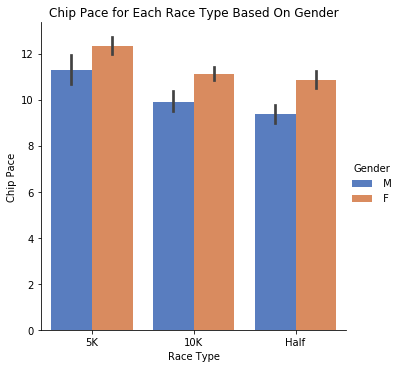

In [21]:
#Creating Barplot
plt.figure(figsize=(10,10),dpi=200),
sns.catplot(x="Race Type", y="Chip Pace", hue="Gender", data=Final_Results,
                kind="bar", palette="muted")
plt.title("Chip Pace for Each Race Type Based On Gender")
plt.show()

<Figure size 2000x2000 with 0 Axes>

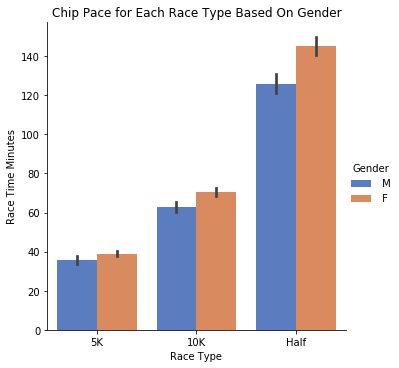

In [22]:
#Creating Barplot
plt.figure(figsize=(10,10),dpi=200),
sns.catplot(x="Race Type", y="Race Time Minutes", hue="Gender", data=Final_Results,
                kind="bar", palette="muted")
plt.title("Chip Pace for Each Race Type Based On Gender")
plt.show()

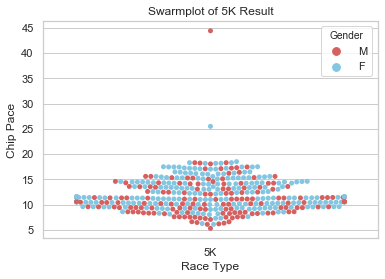

In [23]:
sns.set(style="whitegrid", palette="muted")
sns.swarmplot(x="Race Type", y="Chip Pace", hue="Gender",
              palette=["r", "c", "y"], data=F5)
plt.title("Swarmplot of 5K Result")
plt.show()

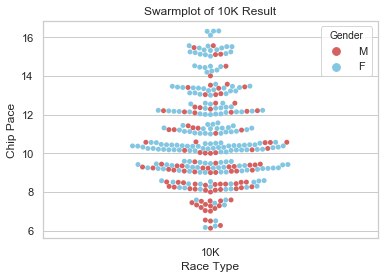

In [24]:
sns.set(style="whitegrid", palette="muted")
sns.swarmplot(x="Race Type", y="Chip Pace", hue="Gender",
              palette=["r", "c", "y"], data=F10)
plt.title("Swarmplot of 10K Result")
plt.show()

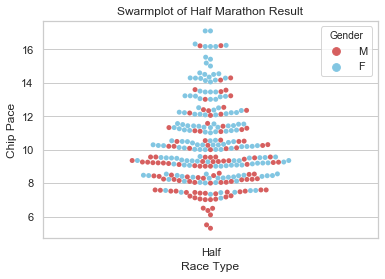

In [25]:
sns.set(style="whitegrid", palette="muted")
sns.swarmplot(x="Race Type", y="Chip Pace", hue="Gender",
              palette=["r", "c", "y"], data=FHalf)
plt.title("Swarmplot of Half Marathon Result")
plt.show()

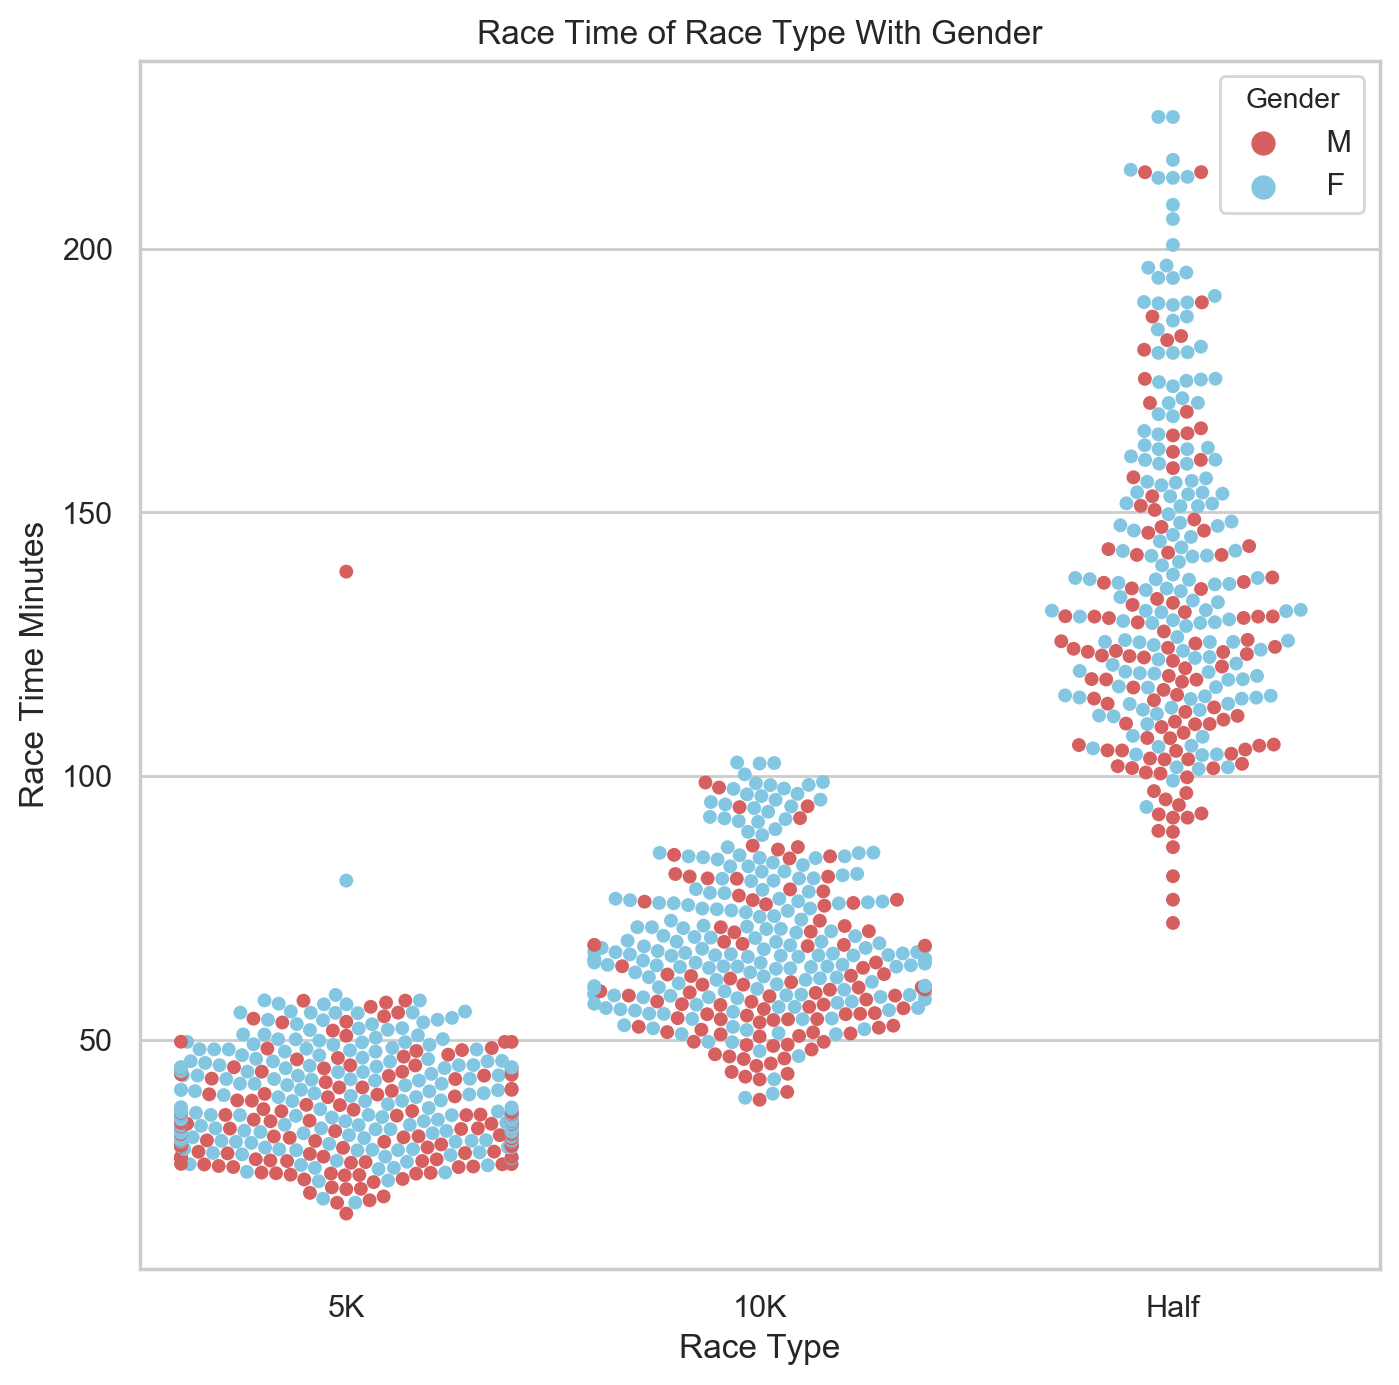

In [26]:
plt.figure(figsize=(8,8),dpi=200),
sns.set(style="whitegrid", palette="muted")
sns.swarmplot(x="Race Type", y="Race Time Minutes", hue="Gender",
              palette=["r", "c", "y"], data=Final_Results)
plt.title("Race Time of Race Type With Gender")
plt.show()